In [5]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import datetime
from dateutil import parser  
import matplotlib.pyplot as plt
import seaborn as sns

#nltk.download('vader_lexicon')
#nltk.download('punkt') 

In [7]:
df = pd.read_csv('/Users/robertwrobel/Downloads/Messages - Robert Wrobel.csv')
#df.head()

In [9]:
df['Message Date'] = pd.to_datetime(df['Message Date'], format="%Y-%m-%d %H:%M:%S")

df['Year'] = df['Message Date'].dt.year
df['Month'] = df['Message Date'].dt.month
df['Day'] = df['Message Date'].dt.day
df['Hour'] = df['Message Date'].dt.hour
df['Weekday'] = df['Message Date'].dt.day_name()

df['Sender'] = df['Type'].apply(lambda x: 'Me' if x == 'Outgoing' else 'Them')

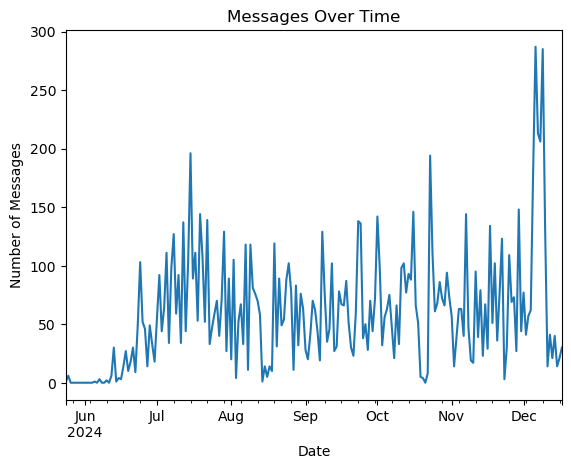

In [11]:
#Messages Per Day
df.set_index('Message Date').resample('D').count()['Text'].plot()
plt.title("Messages Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Messages")
plt.show()

In [13]:
#df = df[df['Type'] == "Incoming"]
#df = df[df['Type'] == "Outgoing"]

In [15]:
#VADER Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

def get_sentiment(text):
    if isinstance(text, str):
        return sia.polarity_scores(text)['compound'] #Compound gets the weighted sum of sentiment scores
    return None

df['Sentiment'] = df['Text'].apply(get_sentiment)

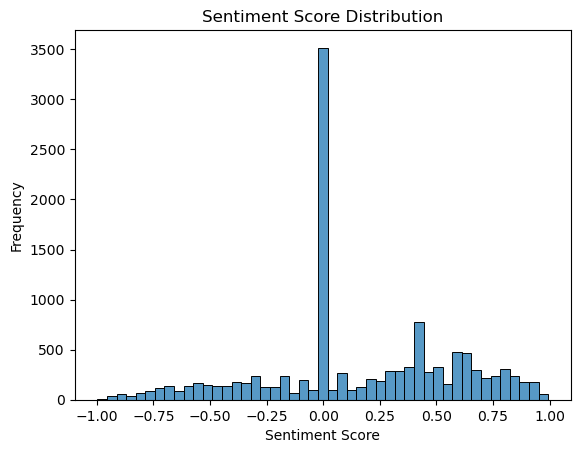

In [17]:
#Sentiment Distribution
sns.histplot(df['Sentiment']) 
plt.title("Sentiment Score Distribution")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()

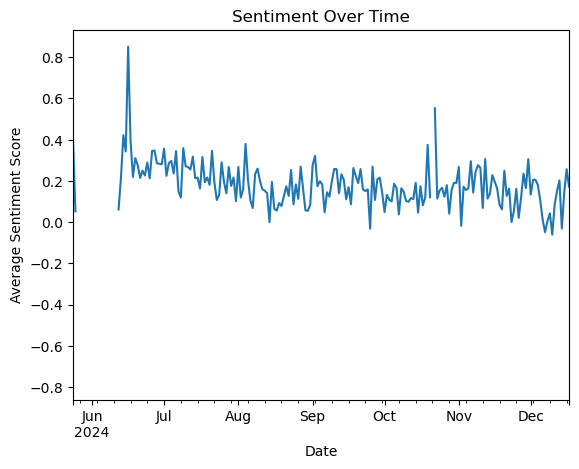

In [19]:
#Daily Average Sentiment Over Time
df.set_index('Message Date').resample('D')['Sentiment'].mean().plot()
plt.title("Sentiment Over Time")
plt.xlabel("Date")
plt.ylabel("Average Sentiment Score")
plt.show()

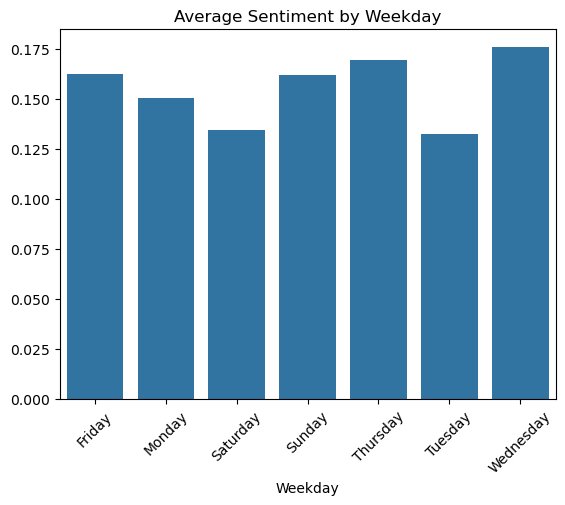

In [21]:
#Average Sentiment by Weekday
sns.barplot(x=df.groupby("Weekday")['Sentiment'].mean().index, y=df.groupby("Weekday")['Sentiment'].mean().values)
plt.xticks(rotation=45)
plt.title("Average Sentiment by Weekday")
plt.show()

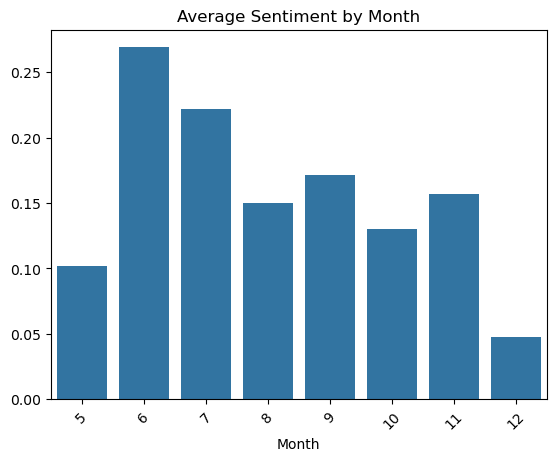

In [23]:
#Average Sentiment by Month
sns.barplot(x=df.groupby("Month")['Sentiment'].mean().index, y=df.groupby("Month")['Sentiment'].mean().values)
plt.xticks(rotation=45)
plt.title("Average Sentiment by Month")
plt.show()

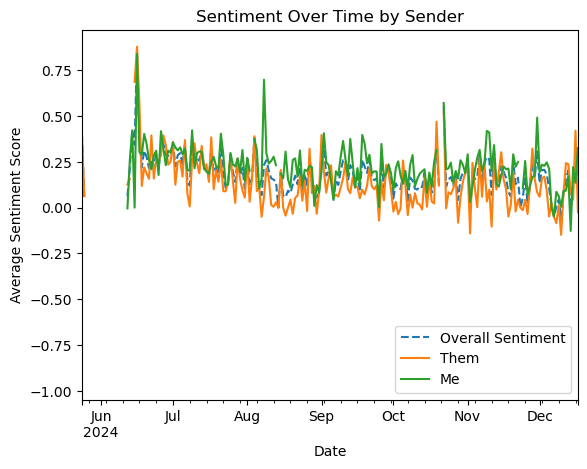

In [25]:
df.set_index('Message Date').resample('D')['Sentiment'].mean().plot(label='Overall Sentiment', linestyle='dashed')

#Split by sender
for sender in ['Them', 'Me']:
    df[df['Sender'] == sender].set_index('Message Date').resample('D')['Sentiment'].mean().plot(label=sender)

plt.title("Sentiment Over Time by Sender")
plt.xlabel("Date")
plt.ylabel("Average Sentiment Score")
plt.legend()
plt.show()

In [27]:
#Sentiment Summary Statistics
print(df['Sentiment'].describe())

mean_sentiment_by_sender = df.groupby('Sender')['Sentiment'].mean()
print(mean_sentiment_by_sender)

count    12357.000000
mean         0.156080
std          0.428116
min         -0.997700
25%          0.000000
50%          0.000000
75%          0.492700
max          0.994200
Name: Sentiment, dtype: float64
Sender
Me      0.200133
Them    0.101891
Name: Sentiment, dtype: float64


In [29]:
#Most Positive and Negative Messages
#print(df.nlargest(5, 'Sentiment')[['Message Date', 'Text', 'Sentiment']])
#print(df.nsmallest(5, 'Sentiment')[['Message Date', 'Text', 'Sentiment']])

Most Positive Messages:
Most Negative Messages:
